In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score




from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn import metrics
from collections import Counter

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


from xgboost import XGBClassifier
import xgboost as xgb

import warnings
warnings.filterwarnings('ignore')

#seleccion de variables
from sklearn.feature_selection import SelectFromModel


In [2]:
df=pd.read_csv('application_data.csv')

In [3]:
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.info(10) # la base de datos original tiene 122 columnas y 307511 filas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [5]:
#elimina filas con datos faltantes
df = df.dropna()

In [6]:
len(df) # la base de datos se reduce a 8602 filas

8602

In [7]:
df['TARGET'].value_counts() # la base de datos esta desbalanceada, hay 8076 filas con TARGET=0 y 526 filas con TARGET=1

TARGET
0    8076
1     526
Name: count, dtype: int64

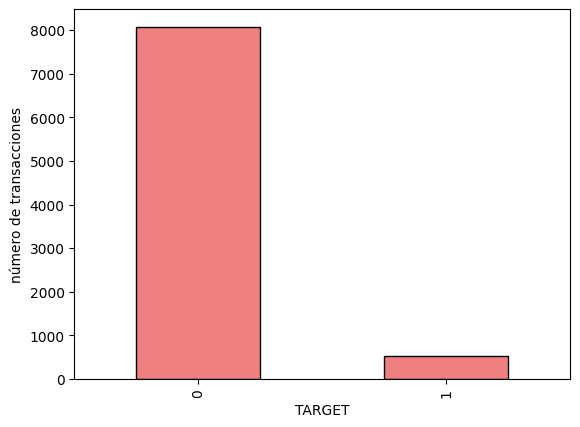

In [8]:

df['TARGET'].value_counts().plot(kind="bar",color="lightcoral",edgecolor="black")
plt.ylabel("número de transacciones")
#guarda la imagen
plt.savefig("grafico.pdf")
plt.show()

In [9]:
#seleccion de variables, X son las variables independientes e y es la variable dependiente

X = df.drop('TARGET', axis=1)
y= df['TARGET']

In [10]:
labels=["Real","Fraude"]

fraud_or_not = df["TARGET"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['TARGET'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
             ,title="Fraude vs Transacciones Verdaderas")
fig.show()

In [11]:
#crea dummy variables
X = pd.get_dummies(X)

In [12]:
X.info(10) #ahora la abse de datos queda de 234 variables en vez de 122

<class 'pandas.core.frame.DataFrame'>
Index: 8602 entries, 71 to 307482
Data columns (total 234 columns):
 #    Column                                             Dtype  
---   ------                                             -----  
 0    SK_ID_CURR                                         int64  
 1    CNT_CHILDREN                                       int64  
 2    AMT_INCOME_TOTAL                                   float64
 3    AMT_CREDIT                                         float64
 4    AMT_ANNUITY                                        float64
 5    AMT_GOODS_PRICE                                    float64
 6    REGION_POPULATION_RELATIVE                         float64
 7    DAYS_BIRTH                                         int64  
 8    DAYS_EMPLOYED                                      int64  
 9    DAYS_REGISTRATION                                  float64
 10   DAYS_ID_PUBLISH                                    int64  
 11   OWN_CAR_AGE                                

In [13]:
#con algoritmo SMOTE se balancea la base de datos, ahora la base queda con 12114 filas, de esta 8076 filas con TARGET=0 y 4038 filas con TARGET=1

# define oversampling and undersampling
over = SMOTE(sampling_strategy=0.5) #aumenta la clase minoritaría al 50% de la mayoritaria
under = RandomUnderSampler(sampling_strategy=0.5) #reduce la clase mayoritaria para que represente un 50% más que la minoritaria

# apply SMOTE
X_over, y_over = over.fit_resample(X, y)
# apply RandomUnderSampler
X_sm, y_sm = under.fit_resample(X_over, y_over)

# summarize the new class distribution
y_sm.value_counts()

TARGET
0    8076
1    4038
Name: count, dtype: int64

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42, stratify=y_sm) #divide la base de datos en entrenamiento y test. 
#El 70% de los datos se usan para entrenar el modelo y el 30% restante para probar el modelo

In [15]:
print(len(X_train)) 
print(len(X_test)) 

8479
3635


De las 12114 filas, 8479 se utilizan para entrenar el modelo y 3635 para probar el modelo

## Algoritmo Random Forest

In [16]:
model=RandomForestClassifier(random_state=42)

Para evitar problemas de dimensionalidad (muchas variables), se aplica selección de caracteristicas. Esto permite reducir el numero de variables en el modelo

In [17]:
# seleccion de variables
selection = SelectFromModel(model, threshold=0.01)
select_X_train = selection.fit_transform(X_train, y_train)


# entrena el modelo con las variables seleccionadas
selection_model = RandomForestClassifier()
selection_model.fit(select_X_train, y_train)


# evalua el modelo 
select_X_test = selection.transform(X_test)

y_pred = selection_model.predict(select_X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2423
           1       0.99      0.86      0.92      1212

    accuracy                           0.95      3635
   macro avg       0.96      0.93      0.94      3635
weighted avg       0.95      0.95      0.95      3635

[[2415    8]
 [ 165 1047]]


El accuracy es de 95%

El recall de los casos de fraude es 0.86

Precision de los casos de fraude es 0.99

F1 score de los casos de fraude es 0.92

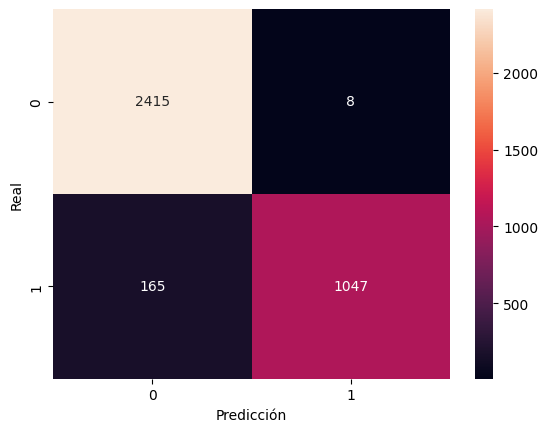

In [18]:
#grafia la matriz de confusion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


Los datos sobre los que evalua el modelo son 3635. De estos 2423 corresponden a transacciones reales y 1212 fraudes. El Modelo predice que 2580 casos son reales, acierta en 2415 y equivoca en 165. Además, predice que 1055 corresponden a fraude, acierta en 1047 y equivoca en 8. Los aciertos se encuentran en la diagonal de la matriz

El accuracy se calcula (2415+1047)/3635

Recall (1047/1212)= 0.86386138
precision= 1047/1054=0.9933586

F1 score= 2 x (0.86386138 x 0.9933586)/(0.86386138+0.9933586)=0.92409



In [20]:
#variables seleccionadas
selected_feat= X.columns[(selection.get_support())]
print(len(selected_feat))

selected_feat


29


Index(['AMT_CREDIT', 'OWN_CAR_AGE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1',
       'EXT_SOURCE_2', 'EXT_SOURCE_3', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'ELEVATORS_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE',
       'NONLIVINGAPARTMENTS_MODE', 'ELEVATORS_MEDI', 'FLOORSMAX_MEDI',
       'FLOORSMIN_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'AMT_REQ_CREDIT_BUREAU_YEAR', 'CODE_GENDER_F', 'CODE_GENDER_M',
       'NAME_INCOME_TYPE_Commercial associate', 'NAME_INCOME_TYPE_Working',
       'NAME_EDUCATION_TYPE_Higher education',
       'NAME_EDUCATION_TYPE_Secondary / secondary special',
       'OCCUPATION_TYPE_Laborers', 'ORGANIZATION_TYPE_Business Entity Type 3',
       'FONDKAPREMONT_MODE_reg oper account', 'WALLSMATERIAL_MODE_Panel'],
      dtype='object')

De las 234 variables del dataset, el modelo solo utilizó 29 variables para realizar la predicción